In [13]:
#Импорт библиотек

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("ggplot")  #using style ggplot

%matplotlib inline

import plotly.graph_objects as go
import plotly.express as px

In [14]:
#Импорт датасета
df=pd.read_csv("./winequality-red.csv")

In [15]:
#Просмотр первых записей
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [16]:
#Вывод количества записей, столбцов
print("Shape The DataSet ", df.shape )

Shape The DataSet  (1599, 12)


In [17]:
#Проверка типов колонок
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [18]:
#Проверка  нулевых значений
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [19]:
# Описание набора значений
df.describe().round(2) 

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00
mean,8.32,0.53,0.27,2.54,0.09,15.87,46.47,1.00,3.31,0.66,10.42,5.64
std,1.74,0.18,0.19,1.41,0.05,10.46,32.90,0.00,0.15,0.17,1.07,0.81
min,4.60,0.12,0.00,0.90,0.01,1.00,6.00,0.99,2.74,0.33,8.40,3.00
25%,7.10,0.39,0.09,1.90,0.07,7.00,22.00,1.00,3.21,0.55,9.50,5.00
50%,7.90,0.52,0.26,2.20,0.08,14.00,38.00,1.00,3.31,0.62,10.20,6.00
75%,9.20,0.64,0.42,2.60,0.09,21.00,62.00,1.00,3.40,0.73,11.10,6.00
max,15.90,1.58,1.00,15.50,0.61,72.00,289.00,1.00,4.01,2.00,14.90,8.00


In [21]:
#Уникальное качество
print("The Value Quality ",df["quality"].unique())

The Value Quality  [5 6 7 4 8 3]


<Axes: >

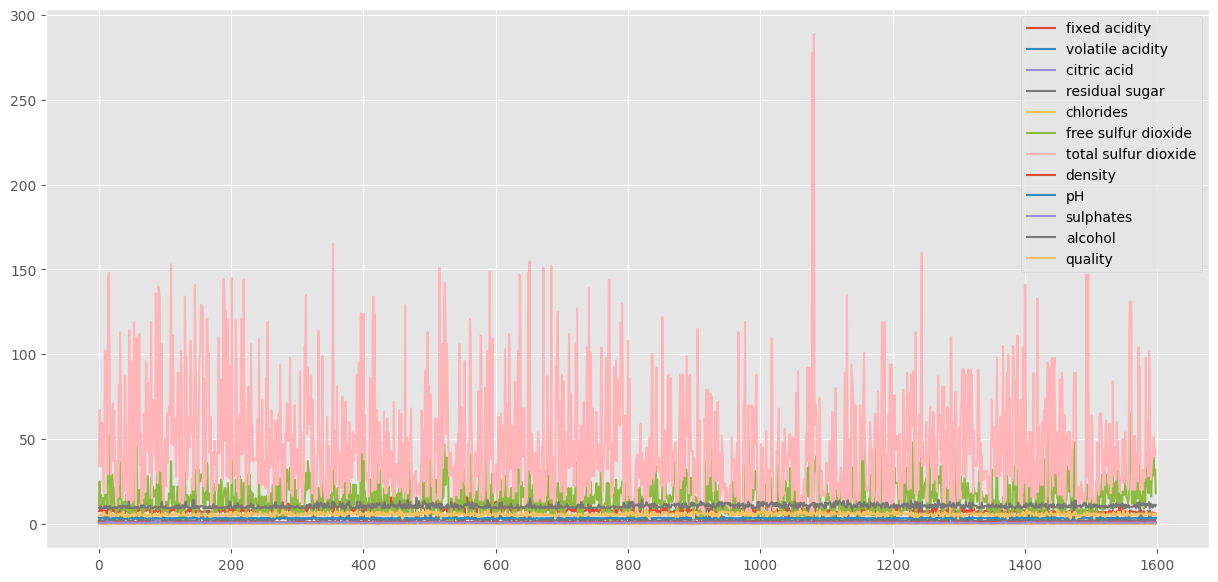

In [22]:
#График набора данных
df.plot(figsize=(15,7))

In [23]:
#Группировка по качеству
ave_qu = df.groupby("quality").mean()
ave_qu

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,8.360000,0.884500,0.171000,2.635000,0.122500,11.000000,24.900000,0.997464,3.398000,0.570000,9.955000
4,7.779245,0.693962,0.174151,2.694340,0.090679,12.264151,36.245283,0.996542,3.381509,0.596415,10.265094
5,8.167254,0.577041,0.243686,2.528855,0.092736,16.983847,56.513950,0.997104,3.304949,0.620969,9.899706
6,8.347179,0.497484,0.273824,2.477194,0.084956,15.711599,40.869906,0.996615,3.318072,0.675329,10.629519
7,8.872362,0.403920,0.375176,2.720603,0.076588,14.045226,35.020101,0.996104,3.290754,0.741256,11.465913
8,8.566667,0.423333,0.391111,2.577778,0.068444,13.277778,33.444444,0.995212,3.267222,0.767778,12.094444


<Axes: xlabel='quality'>

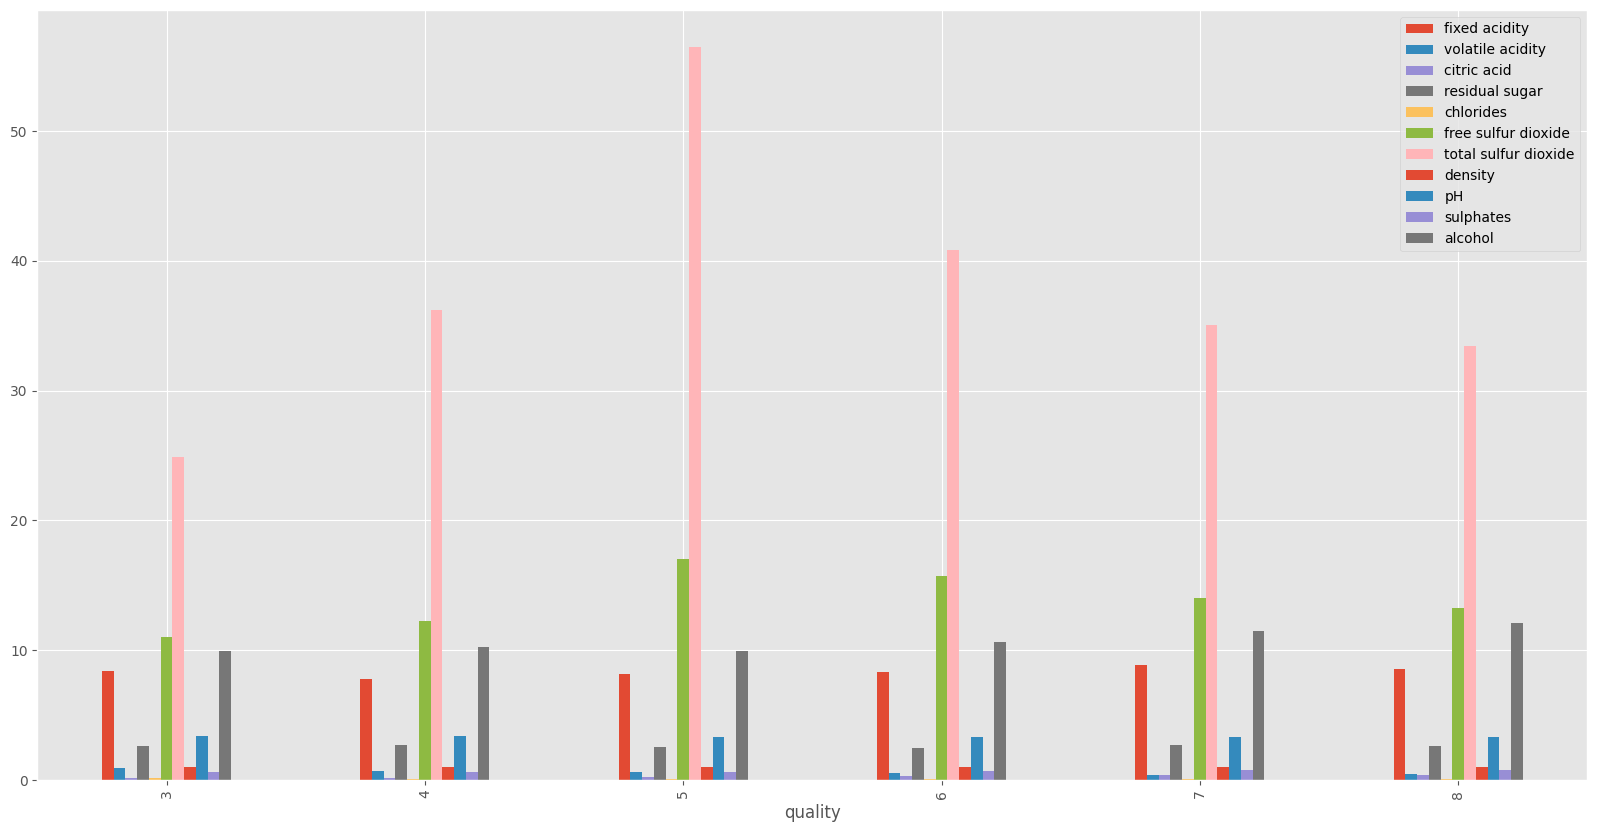

In [24]:
ave_qu.plot(kind="bar",figsize=(20,10))

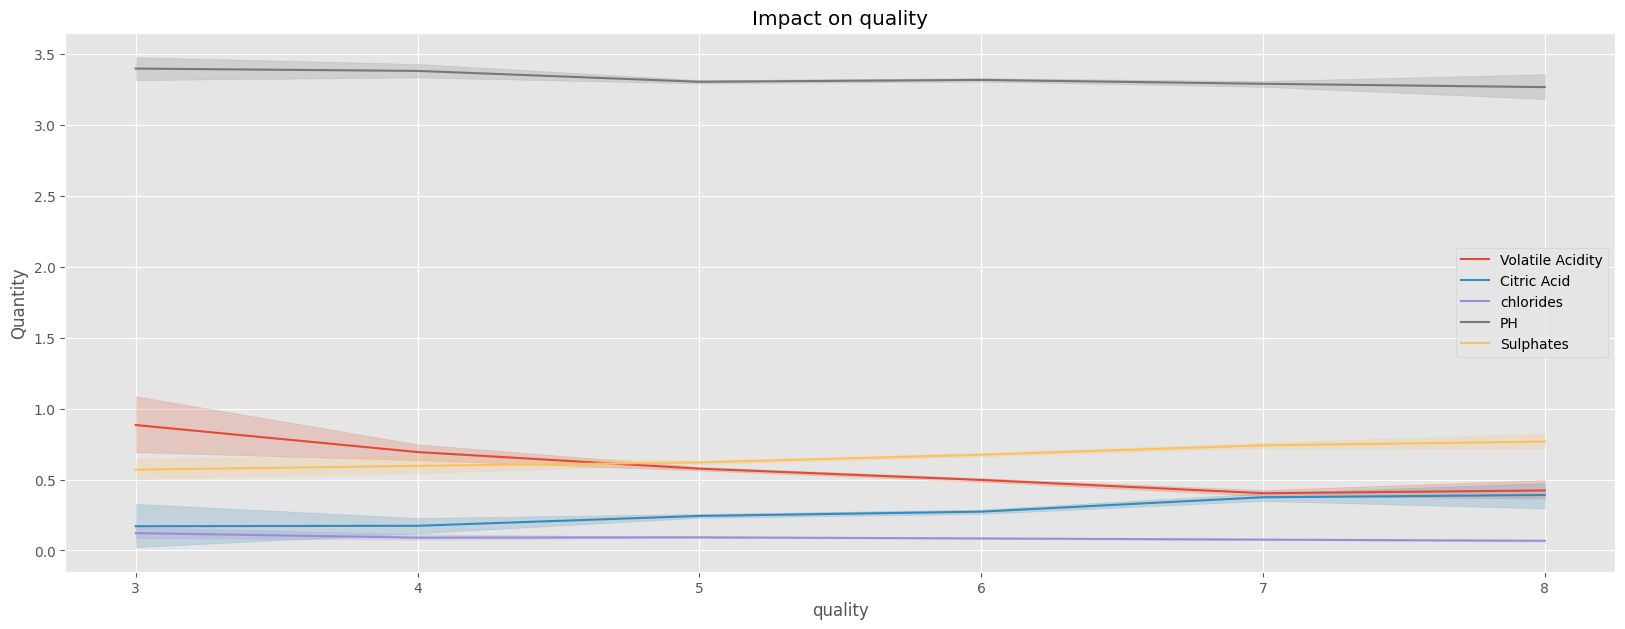

In [25]:
# Влияние элементов на качество
plt.figure(figsize=(20,7))
sns.lineplot(data=df, x="quality",y="volatile acidity",label="Volatile Acidity")
sns.lineplot(data=df, x="quality",y="citric acid",label="Citric Acid")
sns.lineplot(data=df, x="quality",y="chlorides",label="chlorides")
sns.lineplot(data=df, x="quality",y="pH",label="PH")
sns.lineplot(data=df, x="quality",y="sulphates",label="Sulphates")
plt.ylabel("Quantity")
plt.title("Impact on quality")
plt.legend()
plt.show()

<Axes: xlabel='quality', ylabel='alcohol'>

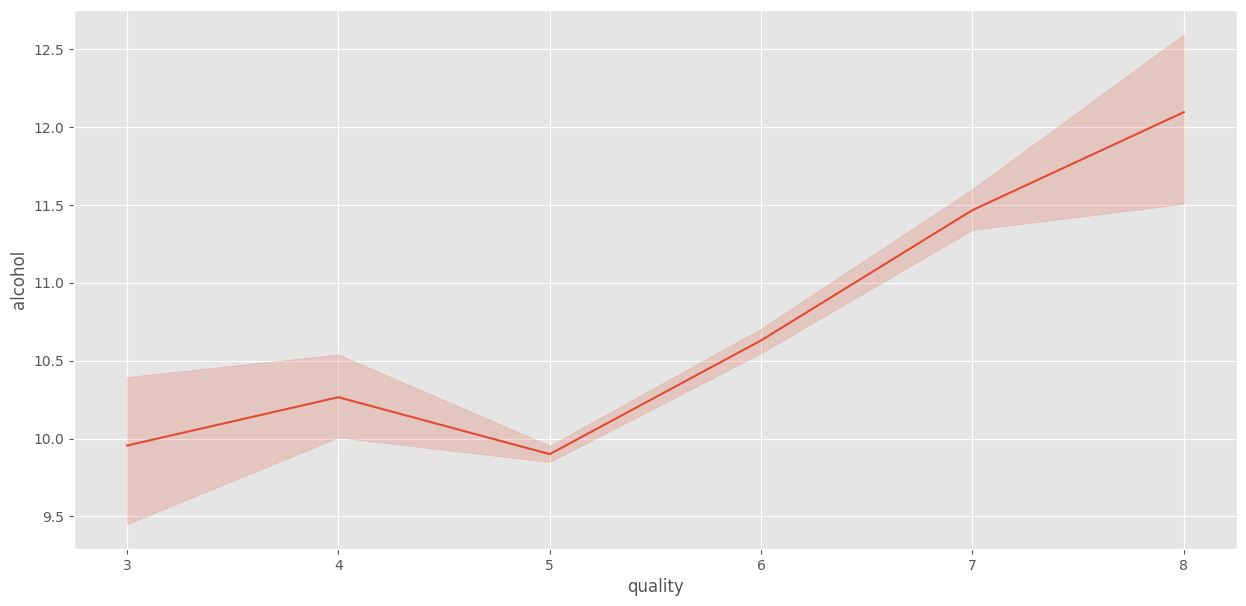

In [26]:
#Влияние алкоголя на качество
plt.figure(figsize=(15,7))
sns.lineplot(data=df, x="quality",y="alcohol")

<Axes: xlabel='quality', ylabel='total sulfur dioxide'>

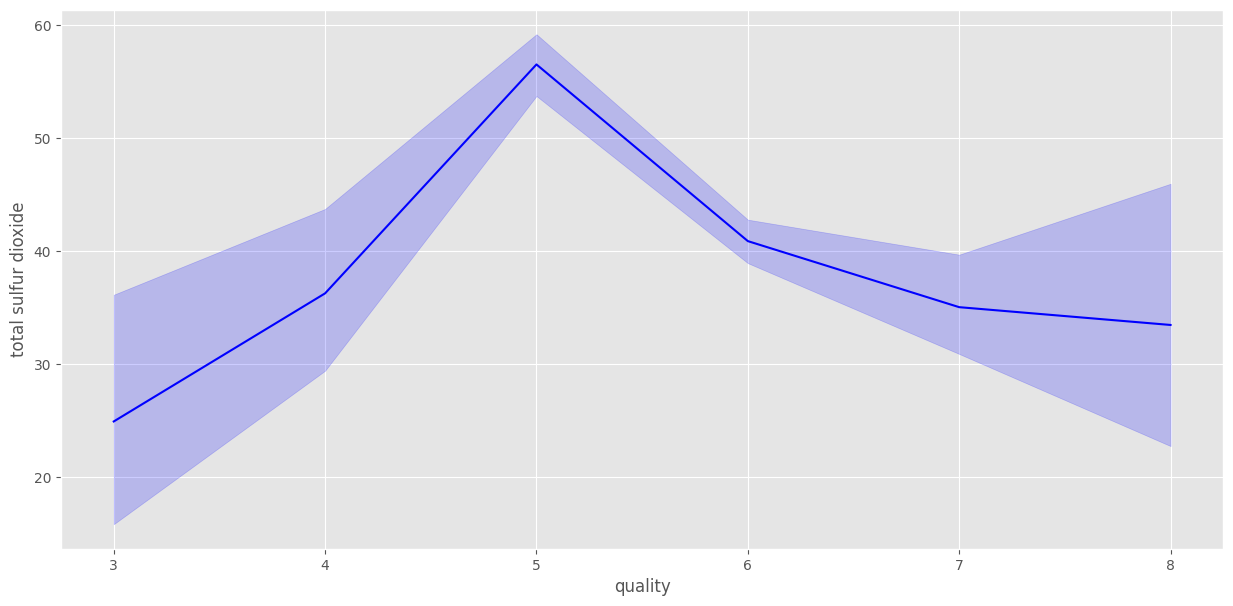

In [27]:
#Влияние диоксида серы на качество
plt.figure(figsize=(15,7))
sns.lineplot(data=df, x="quality",y="total sulfur dioxide",color="b")

<Axes: xlabel='quality', ylabel='free sulfur dioxide'>

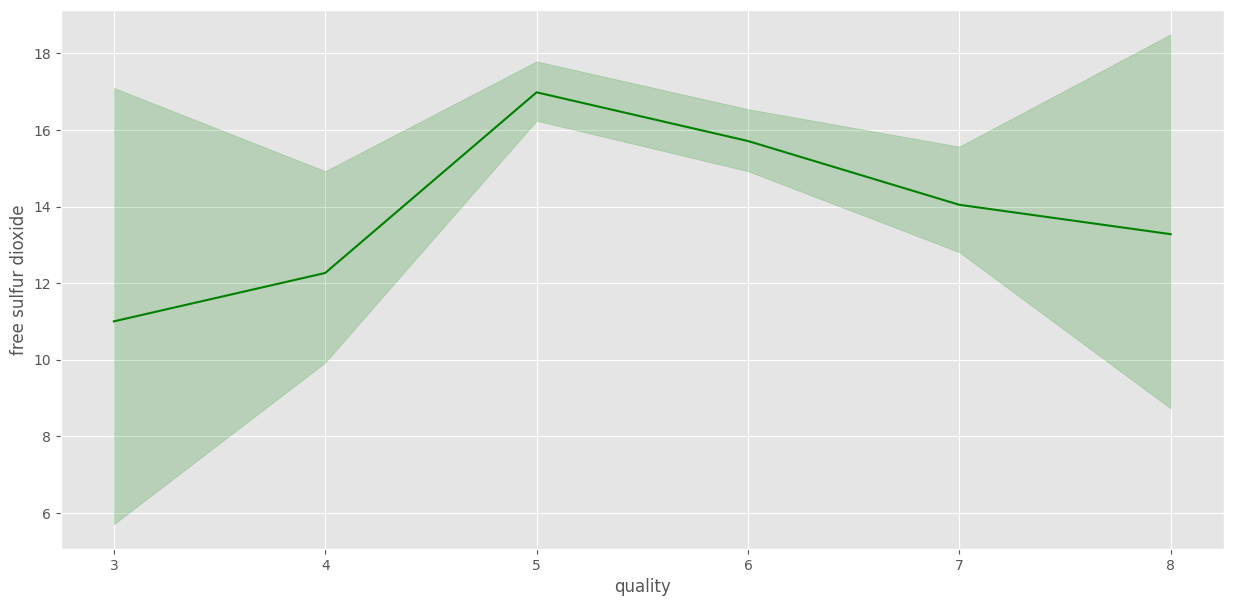

In [28]:
#Влияние свободного диоксида серы на качество
plt.figure(figsize=(15,7))
sns.lineplot(data=df, x="quality",y="free sulfur dioxide",color="g")

In [29]:
#График влияния свободного и общего содержания диоксида серы на качество
px.scatter(df, x="free sulfur dioxide", y="total sulfur dioxide",animation_frame="quality")

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hovertemplate': ('quality=5<br>free sulfur dioxi' ... 'ur dioxide=%{y}<extra></extra>'),
              'legendgroup': '',
              'marker': {'color': '#636efa', 'symbol': 'circle'},
              'mode': 'markers',
              'name': '',
              'orientation': 'v',
              'showlegend': False,
              'type': 'scatter',
              'x': array([11., 25., 15., ..., 29., 32., 32.]),
              'xaxis': 'x',
              'y': array([34., 67., 54., ..., 79., 44., 44.]),
              'yaxis': 'y'}],
    'frames': [{'data': [{'hovertemplate': ('quality=5<br>free sulfur dioxi' ... 'ur dioxide=%{y}<extra></extra>'),
                          'legendgroup': '',
                          'marker': {'color': '#636efa', 'symbol': 'circle'},
                          'mode': 'markers',
                          'name': '',
                          'orientation': 'v',
                          'showlegend': False,
                          'type': 'scatter',
                          'x': array([11., 25., 15., ..., 29., 32., 32.]),
                          'xaxis': 'x',
                          'y': array([34., 67., 54., ..., 79., 44., 44.]),
                          'yaxis': 'y'}],
                'name': '5'},
               {'data': [{'hovertemplate': ('quality=6<br>free sulfur dioxi' ... 'ur dioxide=%{y}<extra></extra>'),
                          'legendgroup': '',
                          'marker': {'color': '#636efa', 'symbol': 'circle'},
                          'mode': 'markers',
                          'name': '',
                          'orientation': 'v',
                          'showlegend': False,
                          'type': 'scatter',
                          'x': array([17., 17., 29., ..., 39., 29., 18.]),
                          'xaxis': 'x',
                          'y': array([60., 56., 60., ..., 51., 40., 42.]),
                          'yaxis': 'y'}],
                'name': '6'},
               {'data': [{'hovertemplate': ('quality=7<br>free sulfur dioxi' ... 'ur dioxide=%{y}<extra></extra>'),
                          'legendgroup': '',
                          'marker': {'color': '#636efa', 'symbol': 'circle'},
                          'mode': 'markers',
                          'name': '',
                          'orientation': 'v',
                          'showlegend': False,
                          'type': 'scatter',
                          'x': array([15. ,  9. , 35. , 13. , 12. ,  3. , 13. ,  9. ,  9. ,  9. ,  7. , 19. ,
                                      10. , 10. , 14. ,  6. , 10. ,  5. , 10. , 20. , 20. , 21. , 21. ,  6. ,
                                      17. ,  7. , 12. , 17. , 12. , 10. ,  7. ,  7. ,  6. ,  6. ,  6. , 16. ,
                                       7. , 12. ,  6. , 35. , 32. ,  6. , 32. ,  6. ,  6. , 11. ,  5. ,  5. ,
                                       5. , 35. , 12. , 13. , 38. , 38. ,  6. ,  6. , 10. ,  6. , 23. ,  6. ,
                                       6. ,  5. , 10. , 54. , 16. ,  5. , 10. ,  7. ,  5. , 10. , 23. , 21. ,
                                      14. ,  4. ,  4. ,  4. , 16. ,  4. , 36. , 36. ,  9. ,  9. , 10. , 16. ,
                                      17. ,  6. ,  6. ,  7. , 29. , 17. , 17. , 16. , 16. , 11. , 11. ,  3. ,
                                      53. , 10. , 23. , 13. ,  9. , 13. , 10. , 11. ,  7. , 11. ,  6. , 10. ,
                                      10. , 10. ,  6. ,  6. ,  5. , 25. ,  6. ,  6. ,  7. ,  9. ,  3. ,  3. ,
                                       3. ,  6. , 31. , 13. ,  4. ,  4. , 13. , 12. , 12. ,  7. , 12. , 12. ,
                                      12. ,  9. ,  9. ,  5. , 26. , 25. , 18. ,  9. ,  3. , 30. ,  3. , 13. ,
                                       3. ,  3. , 19. , 45. , 37.5, 37.5,  3. , 22. , 22. , 11. ,  5. , 10. ,
                                      23. , 13. , 18. , 10. ,  6. ,  6. ,  4. , 45. , 16. ,  6. , 12. , 29. ,

In [30]:
#Импорт библиотек для построения модели
from sklearn.linear_model import LinearRegression ,LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error ,mean_squared_error, median_absolute_error,confusion_matrix,accuracy_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.svm import SVC ,SVR

In [31]:
#Опредедение значения x и значение y и разделение последовательности данных
X = df.drop(columns="quality")           
y = df["quality"]    # y = quality

In [32]:
#Разделение данных на train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print("X Train : ", X_train.shape)
print("X Test  : ", X_test.shape)
print("Y Train : ", y_train.shape)
print("Y Test  : ", y_test.shape)

X Train :  (1199, 11)
X Test  :  (400, 11)
Y Train :  (1199,)
Y Test  :  (400,)


In [33]:
#Использование модели классификатора дерева решений
Tree_model=DecisionTreeClassifier(max_depth=10)

Tree_model.fit(X_train,y_train)

print("Score the X-train with Y-train is : ", Tree_model.score(X_train,y_train))
print("Score the X-test  with Y-test  is : ", Tree_model.score(X_test,y_test))

Score the X-train with Y-train is :  0.9074228523769808
Score the X-test  with Y-test  is :  0.6225


In [34]:
#Выбор важных столбцов
print("The Important columns \n",Tree_model.feature_importances_)

The Important columns 
 [0.05910227 0.12750429 0.05562617 0.07944381 0.03309865 0.01976351
 0.11240455 0.06977884 0.07953043 0.12541298 0.23833449]


In [35]:
df.head(0)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality


In [36]:
print("The classes ",Tree_model.classes_)

y_pred_T =Tree_model.predict(X_test)

print(" Model Evaluation Decision Tree : accuracy score " , accuracy_score(y_test,y_pred_T))

The classes  [3 4 5 6 7 8]
 Model Evaluation Decision Tree : accuracy score  0.6225


In [37]:
#Используем модель SVC
svc_model=SVC(C=50,kernel="rbf")

svc_model.fit(X_train,y_train)

y_pred_svc =svc_model.predict(X_test)

print("Score the X-train with Y-train is : ", svc_model.score(X_train,y_train))
print("Score the X-test  with Y-test  is : ", svc_model.score(X_test,y_test))
print(" Model Evaluation Decision Tree : accuracy score " , accuracy_score(y_test,y_pred_svc))

Score the X-train with Y-train is :  0.5896580483736447
Score the X-test  with Y-test  is :  0.5575
 Model Evaluation Decision Tree : accuracy score  0.5575


In [38]:
#Используем модель SVR

svr_model=SVR(degree=1,coef0=1, tol=0.001, C=1.5,epsilon=0.001)

svr_model.fit(X_train,y_train)

y_pred_svr =svc_model.predict(X_test)

print("Score the X-train with Y-train is : ", svr_model.score(X_train,y_train))
print("Score the X-test  with Y-test  is : ", svr_model.score(X_test,y_test))
print(" Model Evaluation Decision Tree : accuracy score " , accuracy_score(y_test,y_pred_svr))

Score the X-train with Y-train is :  0.19729075780754435
Score the X-test  with Y-test  is :  0.17419765909470553
 Model Evaluation Decision Tree : accuracy score  0.5575


In [39]:
#Используем модель классификатора соседей

K_model = KNeighborsClassifier(n_neighbors = 5)
K_model.fit(X_train, y_train)

y_pred_k = K_model.predict(X_test)

print("Score the X-train with Y-train is : ", K_model.score(X_train,y_train))
print("Score the X-test  with Y-test  is : ", K_model.score(X_test,y_test))
print(" Model Evaluation K Neighbors Classifier : accuracy score " , accuracy_score(y_test,y_pred_k))

Score the X-train with Y-train is :  0.6705587989991659
Score the X-test  with Y-test  is :  0.4675
 Model Evaluation K Neighbors Classifier : accuracy score  0.4675


Результаты построения модели

Классификатор дерева решений
Оценка X-train с помощью Y-train равна: 0,90%
Оценка X-test с помощью Y-test составляет: 0,62%
Оценка точности 0,62%

Модель SVM
1- SVC
Оценка X-train с помощью Y-train равна: 0,58%
Оценка X-теста с помощью Y-теста равна: 0,55%
Оценка точности 0,55%

2-SVR
Оценка X-train с помощью Y-train равна: 0,14%
Оценка X-test с помощью Y-test равна: 0,23%
Оценка точности 0,64%

Модель соседей
Оценка X-train с помощью Y-train равна: 0,67%
Оценка X-test с помощью Y-test составляет: 0,47%
Оценка точности 0,47%